In [50]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
from datetime import *
import datetime as dt
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
import numpy as np
import csv
import re

In [9]:
path = r'C:\chromedriver.exe'
browser = webdriver.Chrome(executable_path=path)
browser.get('https://www.gov.uk/contracts-finder')

C:\Users\user\AppData\Local\Temp\ipykernel_13128\3122305049.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path=path)


In [10]:
browser.maximize_window()

In [11]:
browser.find_element(By.XPATH, "//a[contains(@class, 'gem-c-button')]").click()

In [12]:
browser.find_element(By.XPATH, "//button[@id='adv_search']").click()

In [13]:
pages = int(browser.find_element(By.CSS_SELECTOR, "li[class=standard-paginate] a").text)

In [15]:
tenders_list = []
for i in range(1, pages):
    for t, j in enumerate(browser.find_elements(By.CSS_SELECTOR, "div.search-result")):
        tender = {}
        scraping = j.find_element(By.CSS_SELECTOR, "div h2 a").get_attribute('href')
        r = requests.get(scraping)
        sleep(2)
        soup = BeautifulSoup(r.content, 'html.parser')
        try:
            tender['Tender Name'] = soup.find('h1').text
        except:
            continue
        url = []
        try:
            url.append(i.a['href'] for i in soup.find_all('dd'))
            tender['URLs'] = ', '.join(list(set(url)))
        except:
            if len(url)==0:
                tender['URLs'] = np.nan
        tender['Department'] = soup.find('h2', {'class': 'breadcrumb-description'}).text
        tender['Description'] = soup.find(lambda tag: tag.name=='h3' and 'Description' in tag.text).next_sibling.next_sibling.next_sibling.next_sibling.text
        tender['Notice Status'] = 'Opportunity' if soup.find(lambda tag: tag.name=='p' and 'opportunity' in tag.text) else 'Early Engagement'
        try:
            tender['Last Edited'] = soup.find(lambda tag: tag.name=='p' and 'Last edited' in tag.text).text.replace('Last edited date: ','')
        except:
            tender['Last Edited'] = np.nan
        tender['Industry'] = '. '.join(soup.find('div', {'class':'content-block'}).ul.text.strip('\n').split('\n'))
        for i in soup.find_all('h4'):
            col = i.text
            deet = i.next_sibling.next_sibling.text.strip('\n')
            if col == 'Industry':
                continue
            if col == 'Email':
                deet = deet.split()[0]
            if col == 'Address':
                addr_text = str(i.next_sibling.next_sibling)
                deet = ', '.join(re.sub('<p>|</p>','', addr_text).split('<br/>'))
            tender[col] = deet
        tenders_list.append(tender)
        print('Scraped: ' +scraping)
    browser.find_element(By.XPATH, "//a[contains(text(),'Next')]").click()
    sleep(1)

Scraped: https://www.contractsfinder.service.gov.uk/notice/a0f86e18-d033-4b93-9a84-3eb79c15fd43?origin=SearchResults&p=62
Scraped: https://www.contractsfinder.service.gov.uk/notice/603b53c0-e865-4dd4-987c-59d7e37cc0a2?origin=SearchResults&p=62
Scraped: https://www.contractsfinder.service.gov.uk/notice/40096e99-7684-4b8e-aa5d-1431f9a1fb19?origin=SearchResults&p=62
Scraped: https://www.contractsfinder.service.gov.uk/notice/31575fcf-e5e6-48a1-a998-af0996689eaa?origin=SearchResults&p=62
Scraped: https://www.contractsfinder.service.gov.uk/notice/e5829c7e-005c-4457-ac5b-9d1df30a0cc0?origin=SearchResults&p=62
Scraped: https://www.contractsfinder.service.gov.uk/notice/69cc94a8-3746-419c-af75-d53233aaaa10?origin=SearchResults&p=62
Scraped: https://www.contractsfinder.service.gov.uk/notice/4f0c9f28-2fab-46e8-be3c-f958b1594c8d?origin=SearchResults&p=62
Scraped: https://www.contractsfinder.service.gov.uk/notice/01b11095-173b-4eb1-ba59-63309114cbb3?origin=SearchResults&p=62
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/9c48f0ce-a88f-4260-8c8e-3bfdfbd9a84c?origin=SearchResults&p=65
Scraped: https://www.contractsfinder.service.gov.uk/notice/ece27a06-dd7c-43ff-aeca-ca32c1947600?origin=SearchResults&p=65
Scraped: https://www.contractsfinder.service.gov.uk/notice/a8db7e08-85ec-43a5-bc0b-89cefe3975ad?origin=SearchResults&p=65
Scraped: https://www.contractsfinder.service.gov.uk/notice/d9386161-8902-4be8-9524-eaeada5f67e1?origin=SearchResults&p=65
Scraped: https://www.contractsfinder.service.gov.uk/notice/828a4e8c-85df-40ab-9257-7bea92605738?origin=SearchResults&p=65
Scraped: https://www.contractsfinder.service.gov.uk/notice/56de1c68-3d2b-4b8f-8f53-9a87913f3642?origin=SearchResults&p=65
Scraped: https://www.contractsfinder.service.gov.uk/notice/da00937a-a99b-4ae4-8e37-4aa235acf271?origin=SearchResults&p=65
Scraped: https://www.contractsfinder.service.gov.uk/notice/e165a703-220f-4b51-9b3c-5d06fd1a895e?origin=SearchResults&p=65
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/a957988c-4b17-4096-b192-723318367a22?origin=SearchResults&p=68
Scraped: https://www.contractsfinder.service.gov.uk/notice/96c2cd33-33d7-4c9e-b690-05718ca2fb53?origin=SearchResults&p=68
Scraped: https://www.contractsfinder.service.gov.uk/notice/17f54304-4783-4278-a0b6-6a3f050c5b36?origin=SearchResults&p=68
Scraped: https://www.contractsfinder.service.gov.uk/notice/f5fb76d9-bbef-4c94-8d07-8ab6f4f58a39?origin=SearchResults&p=68
Scraped: https://www.contractsfinder.service.gov.uk/notice/43990f2e-f54b-48bc-8a79-1a5fabed8bf3?origin=SearchResults&p=69
Scraped: https://www.contractsfinder.service.gov.uk/notice/12cf51e3-76db-499e-8e5c-ba33ad622bd8?origin=SearchResults&p=69
Scraped: https://www.contractsfinder.service.gov.uk/notice/06aaf325-d02e-4ce8-b966-448a6fe63f32?origin=SearchResults&p=69
Scraped: https://www.contractsfinder.service.gov.uk/notice/b2fe5185-96e7-469d-b8dc-a287a3cbcc5b?origin=SearchResults&p=69
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/ab549a36-8100-452d-b313-1d3e3354afc3?origin=SearchResults&p=72
Scraped: https://www.contractsfinder.service.gov.uk/notice/d3fdb480-c556-4a57-b27d-3833504e18b5?origin=SearchResults&p=72
Scraped: https://www.contractsfinder.service.gov.uk/notice/200ef13e-1748-4790-8a0a-1e9fb5411b13?origin=SearchResults&p=72
Scraped: https://www.contractsfinder.service.gov.uk/notice/0fc72c2a-1f24-4cff-8b07-c433b52e5334?origin=SearchResults&p=72
Scraped: https://www.contractsfinder.service.gov.uk/notice/8dd62389-9bbf-4714-8e3c-2de48717d741?origin=SearchResults&p=72
Scraped: https://www.contractsfinder.service.gov.uk/notice/4a74d707-7b93-40fc-b14d-39cde3267163?origin=SearchResults&p=72
Scraped: https://www.contractsfinder.service.gov.uk/notice/8bb58d29-28a5-412e-a291-db4e8d9b84ed?origin=SearchResults&p=72
Scraped: https://www.contractsfinder.service.gov.uk/notice/40e348f5-a903-4bf2-8bd6-3f0ca8879f26?origin=SearchResults&p=72
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/e042b02e-30af-461c-8e4d-4d11df3a2e17?origin=SearchResults&p=75
Scraped: https://www.contractsfinder.service.gov.uk/notice/6f4ace81-b429-4862-8c4a-201f19cd2a6c?origin=SearchResults&p=75
Scraped: https://www.contractsfinder.service.gov.uk/notice/fa19b4d4-dbc0-40e6-ae43-3a165194085a?origin=SearchResults&p=75
Scraped: https://www.contractsfinder.service.gov.uk/notice/2ca0c9ac-b357-46f8-a4fc-82c650dd39e2?origin=SearchResults&p=75
Scraped: https://www.contractsfinder.service.gov.uk/notice/c9027568-15ff-4029-9ca0-3e2fcc66fe34?origin=SearchResults&p=75
Scraped: https://www.contractsfinder.service.gov.uk/notice/359a206a-e43d-40c4-87fd-a2800a7246e3?origin=SearchResults&p=75
Scraped: https://www.contractsfinder.service.gov.uk/notice/65718abd-e5a9-4fff-8e35-3635581225e6?origin=SearchResults&p=75
Scraped: https://www.contractsfinder.service.gov.uk/notice/b7182ec2-347a-4573-8663-91195941f000?origin=SearchResults&p=75
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/4e6fcb6c-0f40-46df-9cef-92cc51bad2d4?origin=SearchResults&p=79
Scraped: https://www.contractsfinder.service.gov.uk/notice/d58dffdb-5d0c-4e20-88fa-f4fc928af4ef?origin=SearchResults&p=79
Scraped: https://www.contractsfinder.service.gov.uk/notice/afe6175d-67dd-4901-9792-01d9a0719dd3?origin=SearchResults&p=79
Scraped: https://www.contractsfinder.service.gov.uk/notice/35b9f1ed-d629-4812-8dbd-52e81e7b284c?origin=SearchResults&p=79
Scraped: https://www.contractsfinder.service.gov.uk/notice/3d77cc72-13a3-4efa-950a-ebed9a328980?origin=SearchResults&p=79
Scraped: https://www.contractsfinder.service.gov.uk/notice/8e2ba119-0ca8-4447-a5a6-1c34a6ce471b?origin=SearchResults&p=79
Scraped: https://www.contractsfinder.service.gov.uk/notice/67a6996c-5c1a-4b84-b85e-06b683ea584c?origin=SearchResults&p=79
Scraped: https://www.contractsfinder.service.gov.uk/notice/5a238afc-bf39-452d-bdee-57f3a90711fb?origin=SearchResults&p=79
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/9d7009e5-fea0-46f0-a0bc-7bfa5a219301?origin=SearchResults&p=82
Scraped: https://www.contractsfinder.service.gov.uk/notice/4e878808-667a-4b04-adb9-c32b0741cbe7?origin=SearchResults&p=82
Scraped: https://www.contractsfinder.service.gov.uk/notice/c616cf07-474f-4865-9928-eae08f51933a?origin=SearchResults&p=82
Scraped: https://www.contractsfinder.service.gov.uk/notice/986e5e89-4eb5-45dc-8098-ed5508ac0991?origin=SearchResults&p=82
Scraped: https://www.contractsfinder.service.gov.uk/notice/ba54be46-877e-4f98-a557-6079ad634ec3?origin=SearchResults&p=82
Scraped: https://www.contractsfinder.service.gov.uk/notice/b1df324f-40a7-45a1-85e1-e053f14a856c?origin=SearchResults&p=82
Scraped: https://www.contractsfinder.service.gov.uk/notice/2f39e8d4-e159-4bb2-af66-ce7757263e5d?origin=SearchResults&p=82
Scraped: https://www.contractsfinder.service.gov.uk/notice/d9b2e725-74a7-4f1a-add8-b2a23a5765de?origin=SearchResults&p=82
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/6857234c-dfe1-40a5-b250-c141933495ae?origin=SearchResults&p=85
Scraped: https://www.contractsfinder.service.gov.uk/notice/66bd3724-6c1a-4ebb-8b81-89fb7d6e6070?origin=SearchResults&p=85
Scraped: https://www.contractsfinder.service.gov.uk/notice/56a67672-697c-488e-89c1-196b0bbee3ed?origin=SearchResults&p=85
Scraped: https://www.contractsfinder.service.gov.uk/notice/f0c16231-51f5-43e5-8a49-4aea3bbaffd0?origin=SearchResults&p=85
Scraped: https://www.contractsfinder.service.gov.uk/notice/b1d51ea1-75ed-4341-b8a4-ba89d41d1e49?origin=SearchResults&p=86
Scraped: https://www.contractsfinder.service.gov.uk/notice/9098adeb-5a2c-4236-b30a-3c298488d55d?origin=SearchResults&p=86
Scraped: https://www.contractsfinder.service.gov.uk/notice/41c9d42b-c98b-4b92-b994-41e43346ad49?origin=SearchResults&p=86
Scraped: https://www.contractsfinder.service.gov.uk/notice/f4c2c83f-30f8-4ff1-8c52-f51bb323188e?origin=SearchResults&p=86
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/8fdedfb5-7d7d-4850-bdd7-c766d5055de1?origin=SearchResults&p=89
Scraped: https://www.contractsfinder.service.gov.uk/notice/213f0ef2-3607-4245-9d53-f742840e9daa?origin=SearchResults&p=89
Scraped: https://www.contractsfinder.service.gov.uk/notice/c5143c66-5f0b-4663-9c10-cece8fdb1be9?origin=SearchResults&p=89
Scraped: https://www.contractsfinder.service.gov.uk/notice/f56df502-4f7a-4f7b-99f1-a7747c50228e?origin=SearchResults&p=89
Scraped: https://www.contractsfinder.service.gov.uk/notice/7f413774-a75a-43a8-89ad-2c05d06a968f?origin=SearchResults&p=89
Scraped: https://www.contractsfinder.service.gov.uk/notice/53ce71e7-df82-47b9-91e4-0a02b2dfa6d4?origin=SearchResults&p=89
Scraped: https://www.contractsfinder.service.gov.uk/notice/5a7ab860-470a-44bd-a45f-17e7ac4a2883?origin=SearchResults&p=89
Scraped: https://www.contractsfinder.service.gov.uk/notice/671e95e6-aa60-4093-9e80-89c5d0b00819?origin=SearchResults&p=89
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/0f6ecf61-521b-4b1d-8085-a03800f7e012?origin=SearchResults&p=92
Scraped: https://www.contractsfinder.service.gov.uk/notice/df0de428-382b-4abb-8085-d2ee7bc95320?origin=SearchResults&p=92
Scraped: https://www.contractsfinder.service.gov.uk/notice/c0f1c4a2-24f6-428e-894a-af30cc290ec0?origin=SearchResults&p=92
Scraped: https://www.contractsfinder.service.gov.uk/notice/463ec643-5f2e-410c-bdcd-021f19306de5?origin=SearchResults&p=92
Scraped: https://www.contractsfinder.service.gov.uk/notice/b8c68d5e-0d43-4bdd-a999-e8e1f765f8ea?origin=SearchResults&p=92
Scraped: https://www.contractsfinder.service.gov.uk/notice/e3658a1f-e442-4fb6-a2f3-ff5e807f40bb?origin=SearchResults&p=92
Scraped: https://www.contractsfinder.service.gov.uk/notice/02aebbec-d0a1-4b4e-a475-0bdb570de031?origin=SearchResults&p=92
Scraped: https://www.contractsfinder.service.gov.uk/notice/c0e62860-d114-4204-9bc3-0473b4f4903b?origin=SearchResults&p=92
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/53b4efdf-bef5-445a-aef1-ffab877e9780?origin=SearchResults&p=96
Scraped: https://www.contractsfinder.service.gov.uk/notice/f8a005b8-47fc-4182-a3c8-2a12f4b948a9?origin=SearchResults&p=96
Scraped: https://www.contractsfinder.service.gov.uk/notice/22e4d544-f250-4476-b64e-c76a01de234c?origin=SearchResults&p=96
Scraped: https://www.contractsfinder.service.gov.uk/notice/5e096821-cbbb-4587-a414-7d30a6b41e30?origin=SearchResults&p=96
Scraped: https://www.contractsfinder.service.gov.uk/notice/f6349c02-0499-4d6a-a243-cb1e7dff153e?origin=SearchResults&p=96
Scraped: https://www.contractsfinder.service.gov.uk/notice/727fa92c-09eb-4b93-b857-797b676df431?origin=SearchResults&p=96
Scraped: https://www.contractsfinder.service.gov.uk/notice/55051aed-5c07-4ca0-a5a1-0df6bd90e67b?origin=SearchResults&p=96
Scraped: https://www.contractsfinder.service.gov.uk/notice/7a4b0b7b-5a8a-402e-80f9-b51acf7beefd?origin=SearchResults&p=96
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/a6f06d32-c3fc-4311-af6e-0c415f046226?origin=SearchResults&p=99
Scraped: https://www.contractsfinder.service.gov.uk/notice/17902bea-f4d6-4cc6-aa17-ed7daabafd23?origin=SearchResults&p=99
Scraped: https://www.contractsfinder.service.gov.uk/notice/585d8a05-b1a5-490d-b71b-68a926194a0e?origin=SearchResults&p=99
Scraped: https://www.contractsfinder.service.gov.uk/notice/da38e429-c58c-4138-af8a-1428eea9e932?origin=SearchResults&p=99
Scraped: https://www.contractsfinder.service.gov.uk/notice/4e0e1495-f8aa-4e20-8827-82a542fcd0c4?origin=SearchResults&p=99
Scraped: https://www.contractsfinder.service.gov.uk/notice/48320d39-14f9-436e-b869-4b5347b84995?origin=SearchResults&p=99
Scraped: https://www.contractsfinder.service.gov.uk/notice/b1d552f4-01cd-475b-b751-2aa6a5984294?origin=SearchResults&p=99
Scraped: https://www.contractsfinder.service.gov.uk/notice/57b68a22-8255-480d-8bce-131a8d85b905?origin=SearchResults&p=99
Scraped: https://www.con

Scraped: https://www.contractsfinder.service.gov.uk/notice/1a4f16d4-9f24-4cef-b894-d81ecf102c91?origin=SearchResults&p=102
Scraped: https://www.contractsfinder.service.gov.uk/notice/cef44e98-1483-407b-8811-0a0b01b0ab94?origin=SearchResults&p=102
Scraped: https://www.contractsfinder.service.gov.uk/notice/107a0246-bbd4-453b-9324-c429604cb974?origin=SearchResults&p=102
Scraped: https://www.contractsfinder.service.gov.uk/notice/6ba4245a-0c21-4b9b-bc43-8a2f0f8a2a84?origin=SearchResults&p=102
Scraped: https://www.contractsfinder.service.gov.uk/notice/8109c34e-bb70-4569-b875-7a4b53c2a50c?origin=SearchResults&p=102
Scraped: https://www.contractsfinder.service.gov.uk/notice/1bf6689e-21d2-4c0a-adb6-213acc8858db?origin=SearchResults&p=103
Scraped: https://www.contractsfinder.service.gov.uk/notice/024bb873-1ff0-4841-8ee4-f23cc99a351f?origin=SearchResults&p=103
Scraped: https://www.contractsfinder.service.gov.uk/notice/3273a1b3-1e6c-4fe5-a1f9-ba3e1ff7a26c?origin=SearchResults&p=103
Scraped: https:/

Scraped: https://www.contractsfinder.service.gov.uk/notice/e8fa4880-d8bb-464f-9fc3-e14a88e293a0?origin=SearchResults&p=106
Scraped: https://www.contractsfinder.service.gov.uk/notice/9681fc83-e5ac-407c-b0ed-0b580fca7013?origin=SearchResults&p=106
Scraped: https://www.contractsfinder.service.gov.uk/notice/8e2829ca-b5b5-4d41-97fb-2adb6fbb7381?origin=SearchResults&p=106
Scraped: https://www.contractsfinder.service.gov.uk/notice/14741524-f2d3-4590-81cc-d41a438305fb?origin=SearchResults&p=106
Scraped: https://www.contractsfinder.service.gov.uk/notice/69156340-f0c8-4ac9-ba26-2017a49d157e?origin=SearchResults&p=106
Scraped: https://www.contractsfinder.service.gov.uk/notice/158d8a6d-5706-4abb-bab5-c28d860affa0?origin=SearchResults&p=106
Scraped: https://www.contractsfinder.service.gov.uk/notice/a1d58363-5120-46f2-b717-faeb23e44632?origin=SearchResults&p=106
Scraped: https://www.contractsfinder.service.gov.uk/notice/67cd2dd6-91a1-4f48-9560-2c24fc797668?origin=SearchResults&p=106
Scraped: https:/

Scraped: https://www.contractsfinder.service.gov.uk/notice/00883f7c-520d-431a-a38a-0d687f7800d5?origin=SearchResults&p=109
Scraped: https://www.contractsfinder.service.gov.uk/notice/d8c68187-322e-4dfe-b207-84d779e9fad9?origin=SearchResults&p=109
Scraped: https://www.contractsfinder.service.gov.uk/notice/f4efa36c-b7a7-4f98-998e-9074e4c259ba?origin=SearchResults&p=109
Scraped: https://www.contractsfinder.service.gov.uk/notice/0b351958-6615-4c80-88f4-421ac6258b6f?origin=SearchResults&p=109
Scraped: https://www.contractsfinder.service.gov.uk/notice/b1be66bf-565e-4050-9711-4d1a92d1f4eb?origin=SearchResults&p=109
Scraped: https://www.contractsfinder.service.gov.uk/notice/6c6e026f-0851-49a1-b313-80a497c38396?origin=SearchResults&p=109
Scraped: https://www.contractsfinder.service.gov.uk/notice/d539c6a1-547b-41cd-b603-9517bc15f139?origin=SearchResults&p=109
Scraped: https://www.contractsfinder.service.gov.uk/notice/37a9c78d-0ee5-404a-bb75-e37c162a9e53?origin=SearchResults&p=109
Scraped: https:/

In [16]:
df = pd.DataFrame(tenders_list)
df

,Tender Name,Department,Description,Notice Status,Last Edited,Industry,Location of contract,Value of contract,Procurement reference,Published date,...,Contract is suitable for VCSEs?,Contact name,Address,Telephone,Email,Website,Previous notice about this procurement,Approach to market date,Spend profile,Justification
0,1 x Assistant Resourcing Specialist (ARS),Sandwell Metropolitan Borough Council,1 x Assistant Resourcing Specialist (ARS)\r\n ...,Opportunity,NaN,Recruitment services - 79600000,B70 8SZ,"£4,892.88 to £5,736.48",IT-230-6226-ARS 14/09/22 WL,15 September 2022,...,No,Karendeep Bassra,"1 Providence Place, West Bromwich, West Midlan...",0121 569 4766,karendeep_bassra@sandwell.gov.uk,NaN,NaN,NaN,NaN,NaN
1,Invitation to tender for creation of a Skatepa...,Evercreech Parish Council,Evercreech Parish Council (the 'Council') owns...,Opportunity,NaN,"Recreational, cultural and sporting services -...",BA4 6PE,"£75,000",Evercreech1,14 September 2022,...,No,Julie Ferguson,"Evercreech Parish Council, Evercreech House, E...",07783 475200,rfo@evercreech-pc.gov.uk,https://www.evercreech-pc.gov.uk,NaN,NaN,NaN,NaN
2,PRJ 1206 Organisational Development and Popula...,NHS South East London Integrated Care Board,NHS South East London Integrated Care Board (S...,Opportunity,14 September 2022,Health services - 85100000,England,"£45,000",NELondon001-DN633170-02128514,14 September 2022,...,Yes,Tim Odejobi,"2nd Floor, Unex Tower, 5 Station Street, Londo...",NaN,t.odejobi@nhs.net,http://www.elc.nhs.uk/,PRJ 1206 Organisational Development and Popula...,NaN,NaN,NaN
3,CBC-1431-FA-LS Homecare & Support in the Commu...,Central Bedfordshire Council,Lot 1 - Adults - The Council offers a range of...,Opportunity,NaN,Supply services of domestic help personnel - 7...,SG17 5TQ,£0,IT-33-3142-CBC-1431-FA-LS,14 September 2022,...,No,Linda Sharpstone,"Priory House, Shefford, Bedfordshire, SG17 5TQ...",0300 300 5850,linda.sharpstone@centralbedfordshire.gov.uk,NaN,NaN,NaN,NaN,NaN
4,Car Park Management and Enforcement,West Midlands Combined Authority,"Transport for West Midlands (TfWM), part of th...",Opportunity,NaN,Car park management services - 98351000,B19 3SD,"£0 to £120,000",tender_316940/1106129,14 September 2022,...,Yes,West Midlands Combined Authority,"16 Summer Lane, Birmingham, B19 3SD, England",NaN,procurement.team@wmca.org.uk,www.wmca.org.uk,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,Care @ Home Approved List,Herefordshire Council,Care @ Home - Herefordshire Council is seeking...,Opportunity,NaN,Health and social work services - 85000000,West Midlands,"£11,000,000",HEREFCC-DN309229-22393939,30 April 2018,...,Yes,Mark Cage,"Council Offices, Plough Lane, Hereford, HR4 0L...",+44 1432383605,mark.cage@herefordshire.gov.uk,https://www.herefordshire.gov.uk,NaN,NaN,NaN,NaN
2185,Dynamic Purchasing System for the supply of Pa...,Suffolk Sourcing,Suffolk County Council are inviting applicants...,Opportunity,29 March 2018,Transport services (excl. Waste transport) - 6...,IP1 2BX,"£0 to £175,000,000",CD1204/1,29 March 2018,...,No,Passenger Transport Unit - Business Support Team,"Russell Road, Ipswich, Suffolk, IP1 2BX, England",NaN,passenger.transport@suffolk.gov.uk,https://www.suffolk.gov.uk/business-jobs-and-c...,NaN,NaN,NaN,NaN
2186,SOUTH TYNESIDE COUNCIL WASTE MATERIAL STREAMS ...,South Tyneside Council,A Dynamic Purchasing System (DPS) is a procedu...,Opportunity,NaN,Environmental services - 90700000,North East,£0,F6575,29 March 2018,...,No,Chris Taylor,"Town Hall, Westoe Road, South Shields, NE332RL...",07484030477,chris.taylor@southtyneside.gov.uk,NaN,NaN,NaN,NaN,NaN
2187,Pseudo Dynamic Purchasing System (PDPS) for Ra...,NHS NORTH OF ENGLAND COMMISSIONING SUPPORT (HO...,North of England Commissioning Support (NECS) ...,Opportunity,NaN,Health services - 85100000,North East,£0,NECS267.,12 March 2018,...,No,Michael Robertson,"JOHN SNOW HOUSE, DURHAM, DH13YG, England",01642 745068,michael.rob

In [17]:
df.to_csv('Tenders.csv')

In [25]:
df['Published Month'] = [re.search('\d+\s(\w+)\s\d+', date).group(1) for date in df['Published date']]
df['Published Year'] = [re.search('\d+\s\w+\s(\d+)', date).group(1) for date in df['Published date']]

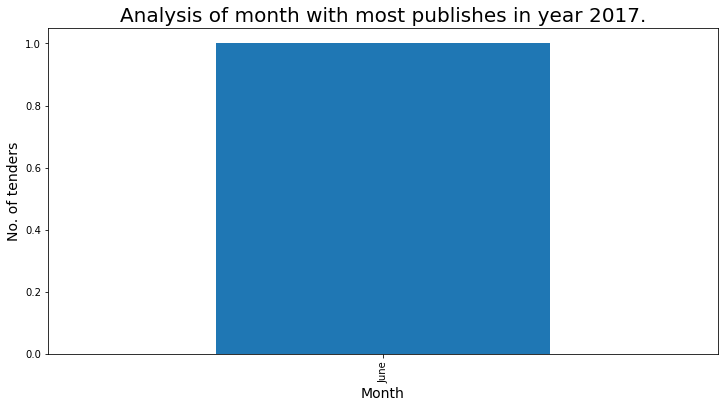

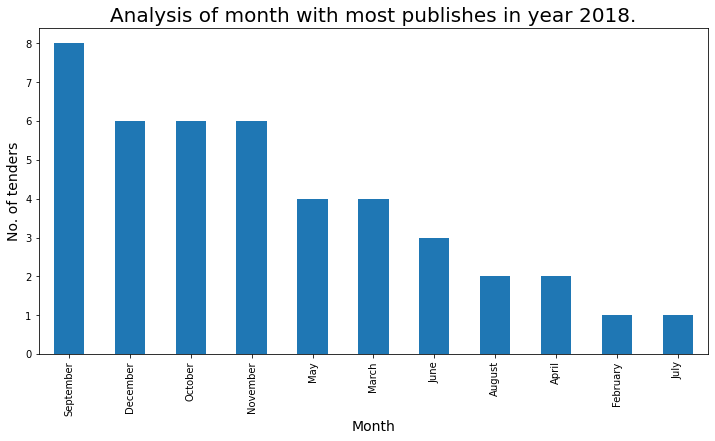

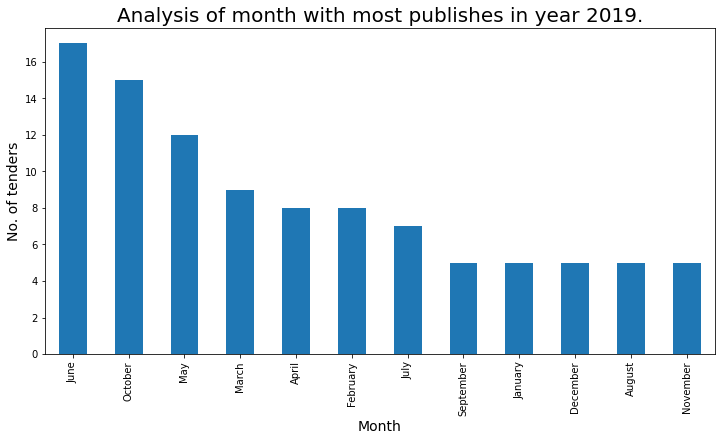

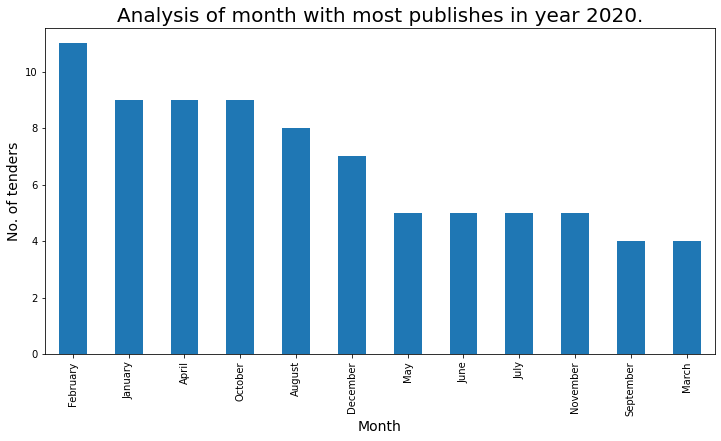

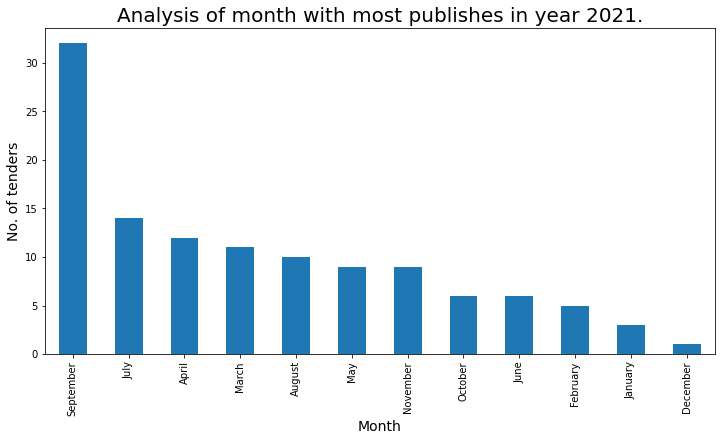

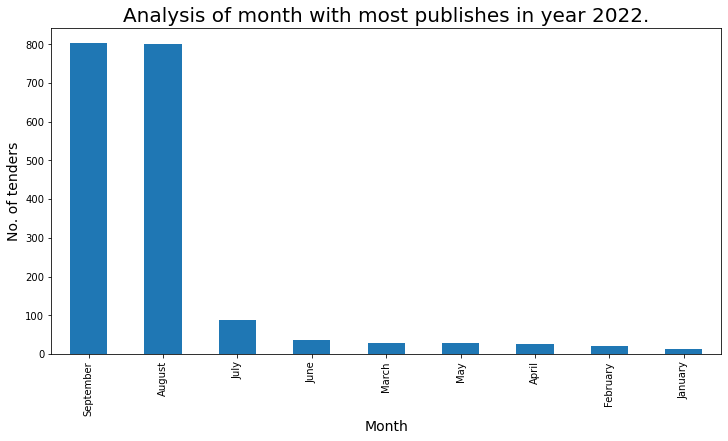

In [49]:
months_group_by_year = df.groupby('Published Year')
for year, months in months_group_by_year:
    fig = plt.figure(figsize=(12,6))
    active_month = months['Published Month'].value_counts()
    active_month.plot.bar()
    plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
    plt.ylabel('No. of tenders',fontdict={'fontsize': 14,'fontweight': 10})
    plt.title('Analysis of month with most publishes in year '+str(year)+'.',fontdict={'fontsize': 20,
        'fontweight': 8})
    plt.show()
    fig.savefig('Analysis of month with most publishes in year '+str(year)+'.png')

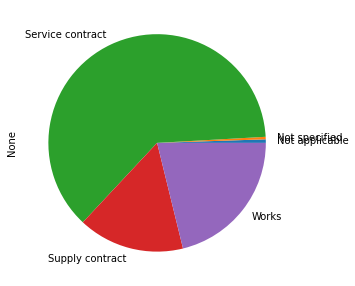

In [48]:
fig = plt.figure(figsize=(15,5))
df.groupby(df['Contract type']).size().plot(kind='pie')
fig.savefig('Contract types.png')

In [51]:
stop_words=set(stopwords.words("english"))
punctuations=list(string.punctuation)

In [52]:
def cleaned_industries(i):
    cleaned = re.sub('(http\S+)|\'|(\n)|[0-9]+',' ',i)
    tokens = word_tokenize(cleaned)
    filtered_tokens = []
    for w in tokens:
        if w not in stop_words:
            if w not in punctuations:
                filtered_tokens.append(w)
    return filtered_tokens

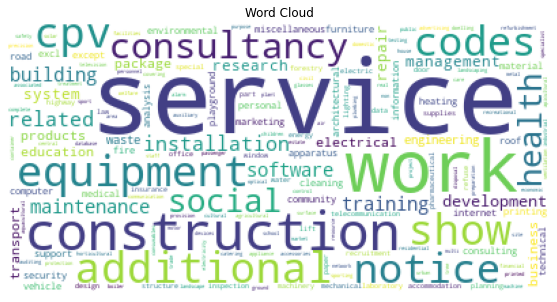

In [55]:
my_tokens = cleaned_industries((" ".join(df['Industry'])).lower())
text = " ".join(my_tokens)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
fig= plt.figure(figsize=(15,5))
title= "Word Cloud"
plt.title(title)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
file = 'Word_Cloud.png'
fig.savefig(file)